In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_parquet("../archivos/staging/staging.parquet")

In [3]:
df = df.drop("SimillarHTTP", axis=1)
df = df.drop("Timestamp", axis=1)

In [4]:
for column in df.columns:
    if df[column].value_counts().count() == 1:
       df = df.drop(column, axis=1)

Pasos:

- Augmentation (?)
- Skewness
- Escalado
- Reduccion de Dim.

Modelos:

- ML: Mayor explicabilidad
- DL: LNN ligera
- Cluster: (?)

In [5]:
df.columns

Index(['Source IP', 'Source Port', 'Destination IP', 'Destination Port',
       'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s',
       'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length',
       'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance',
       'SYN Flag Count', 'RST Flag Count', 'ACK F

In [6]:
scaler = MinMaxScaler()

raw_cols = ["LabelIndex", "Source Port", "Destination Port"]
cols = [col for col in df.columns if col not in raw_cols]

df[cols] = scaler.fit_transform(df[cols])

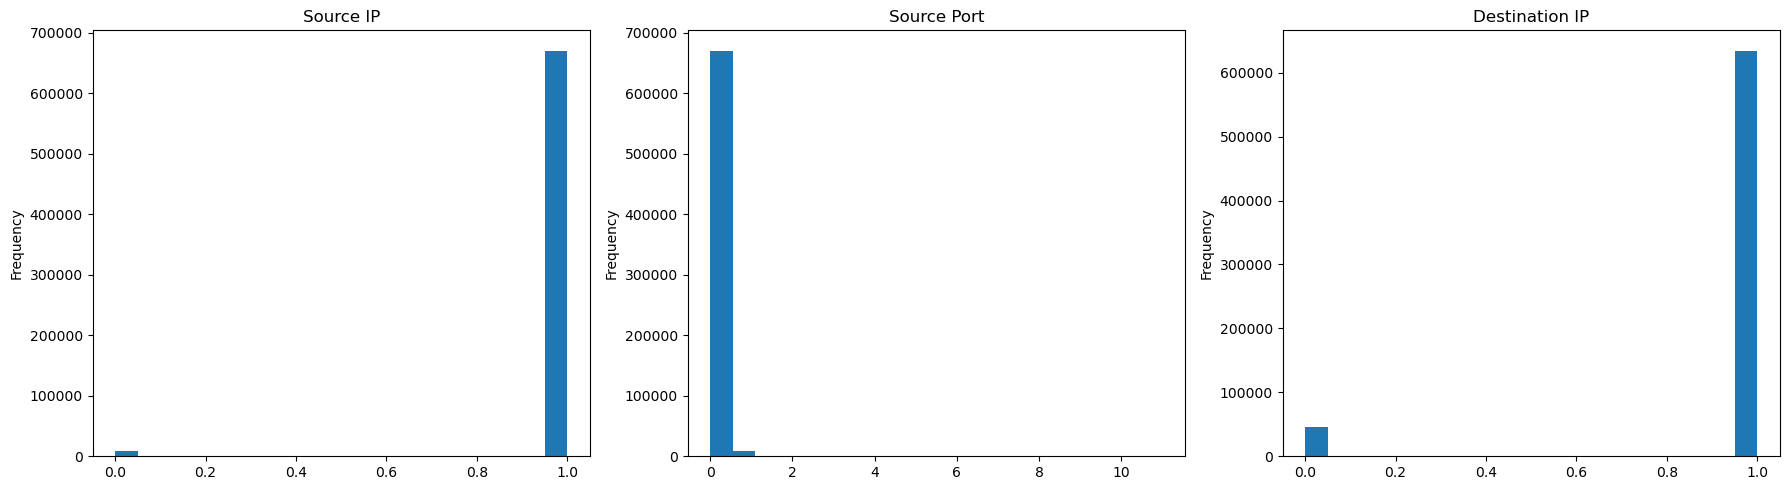

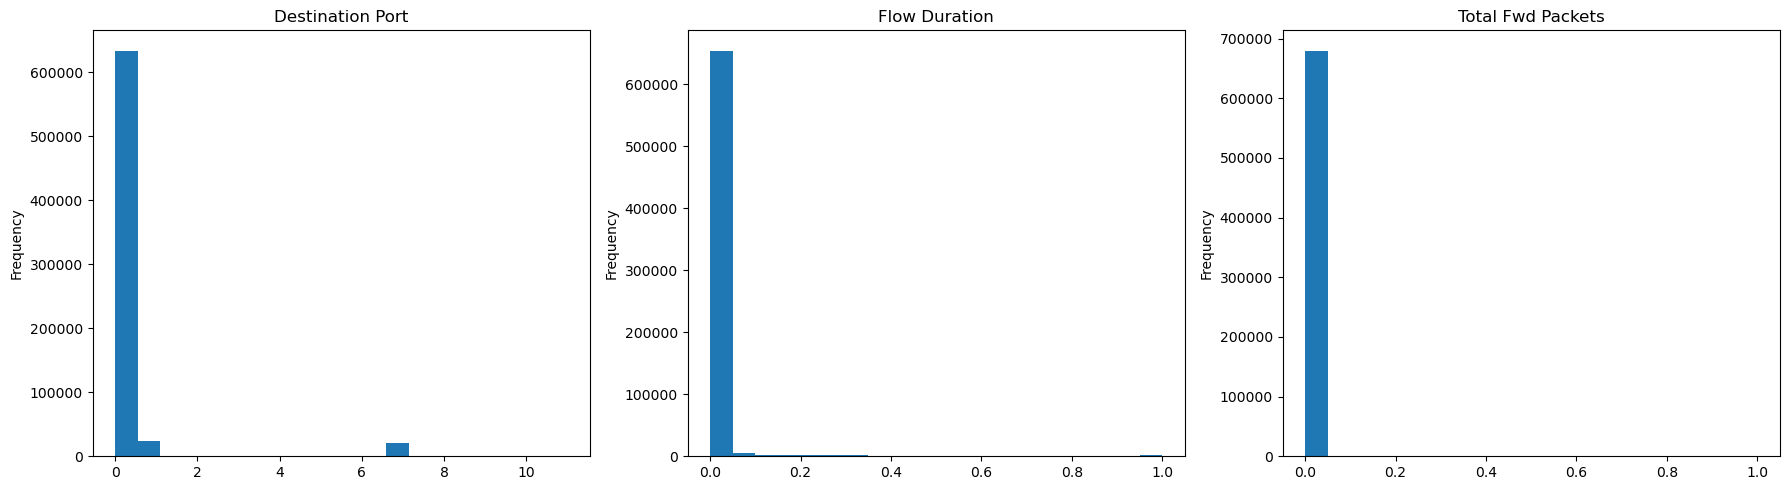

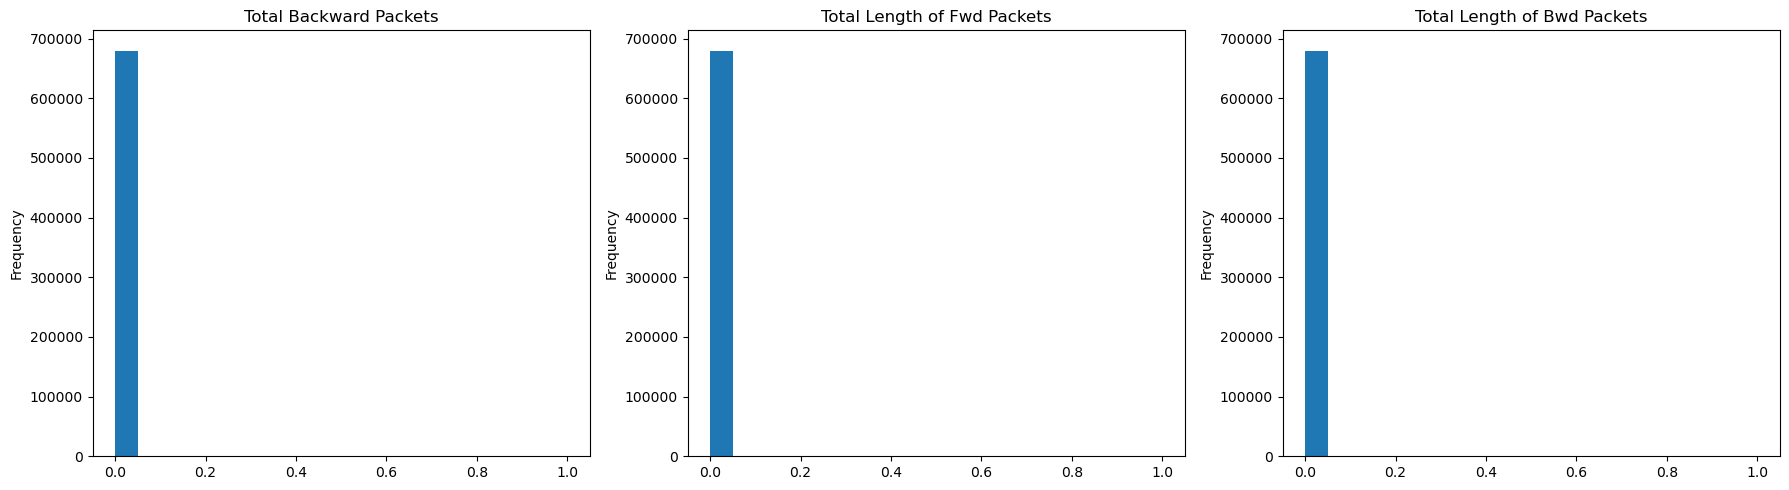

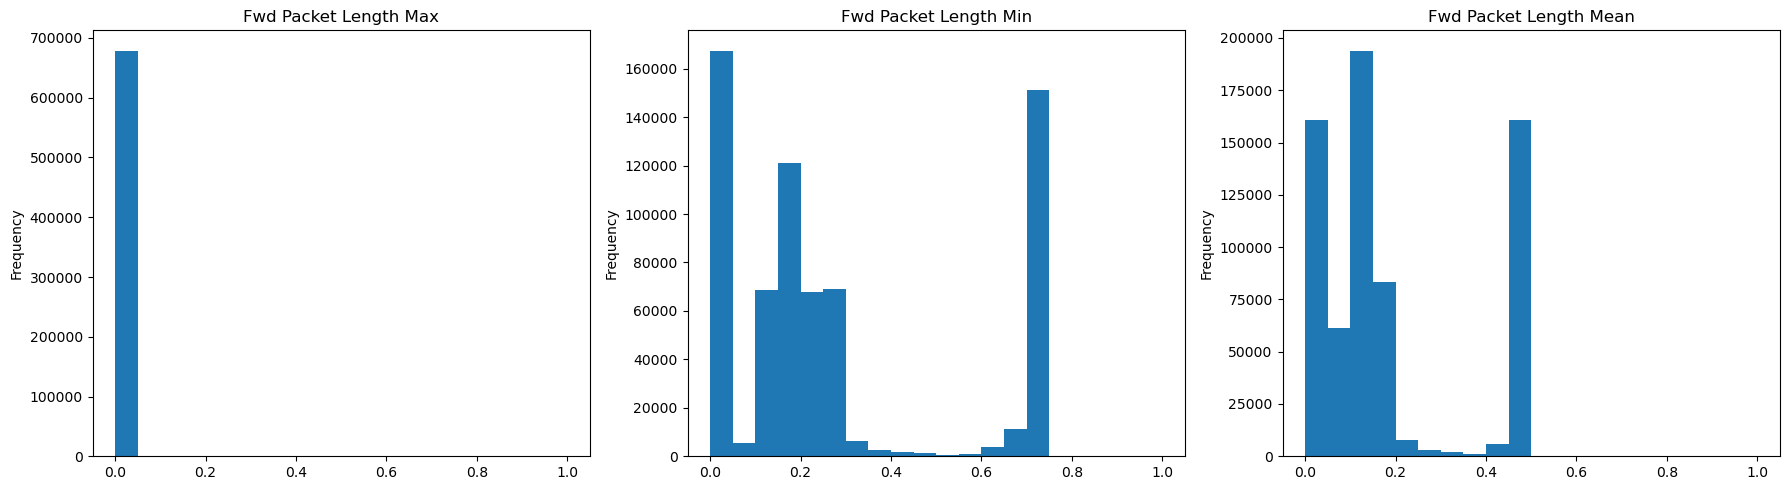

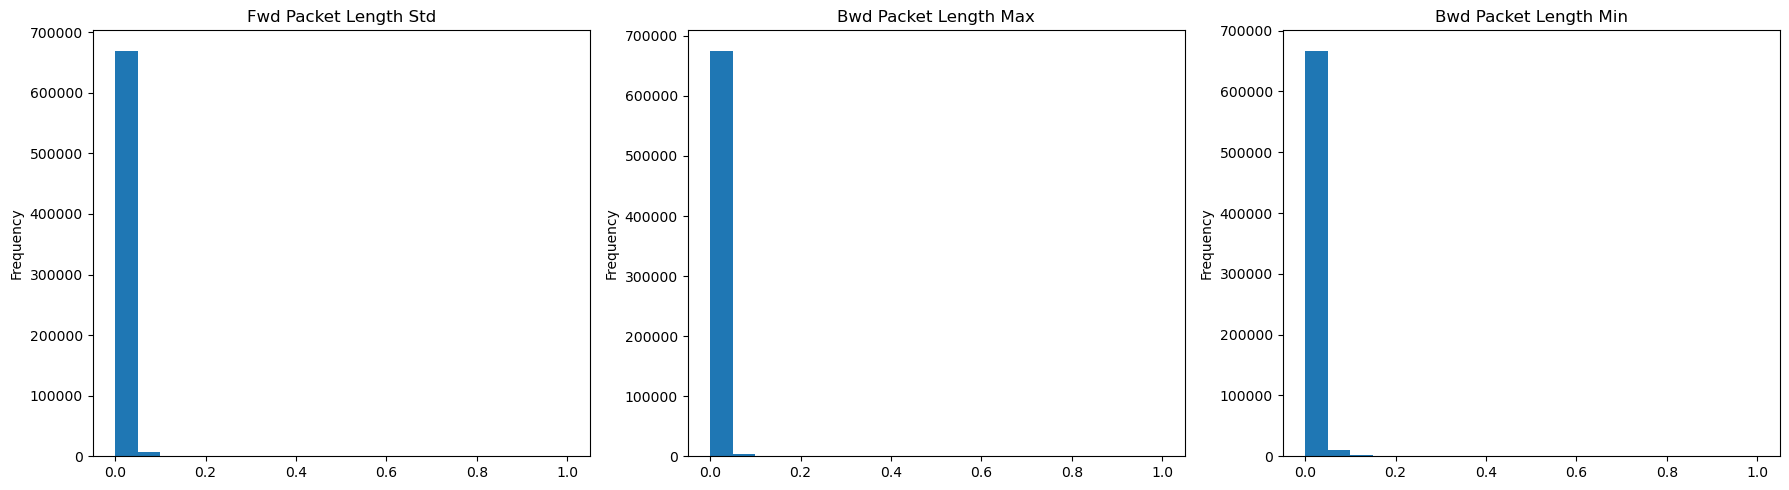

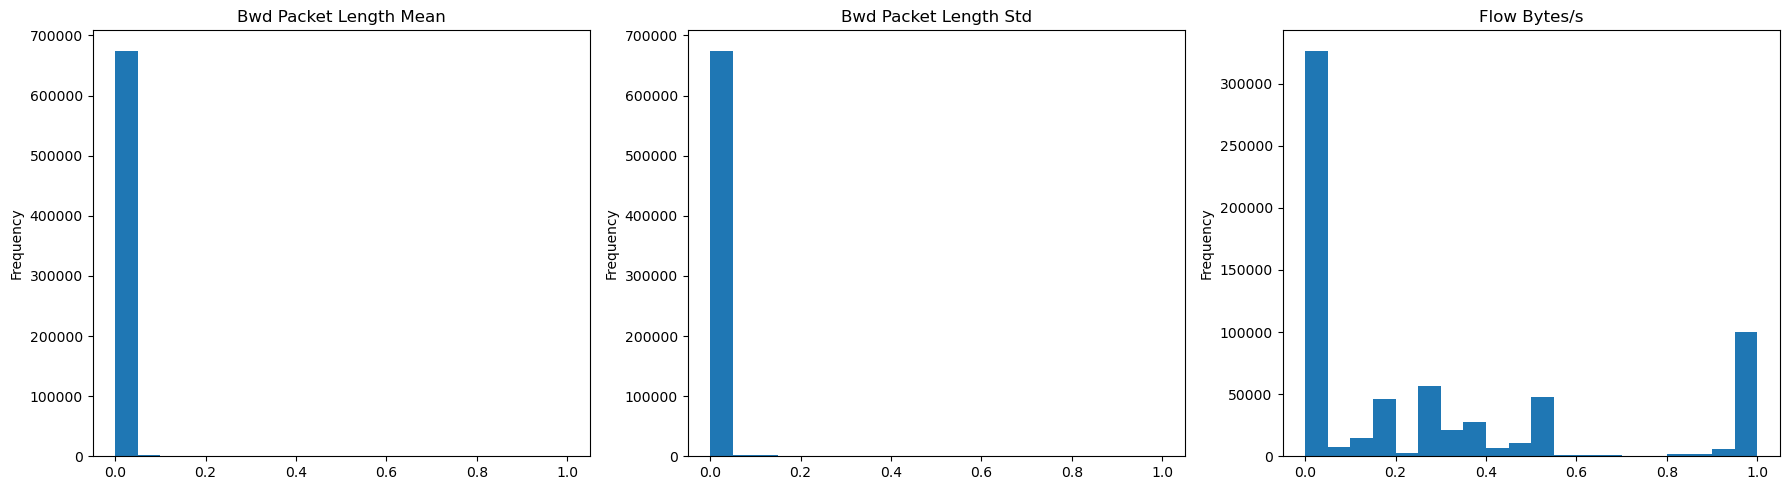

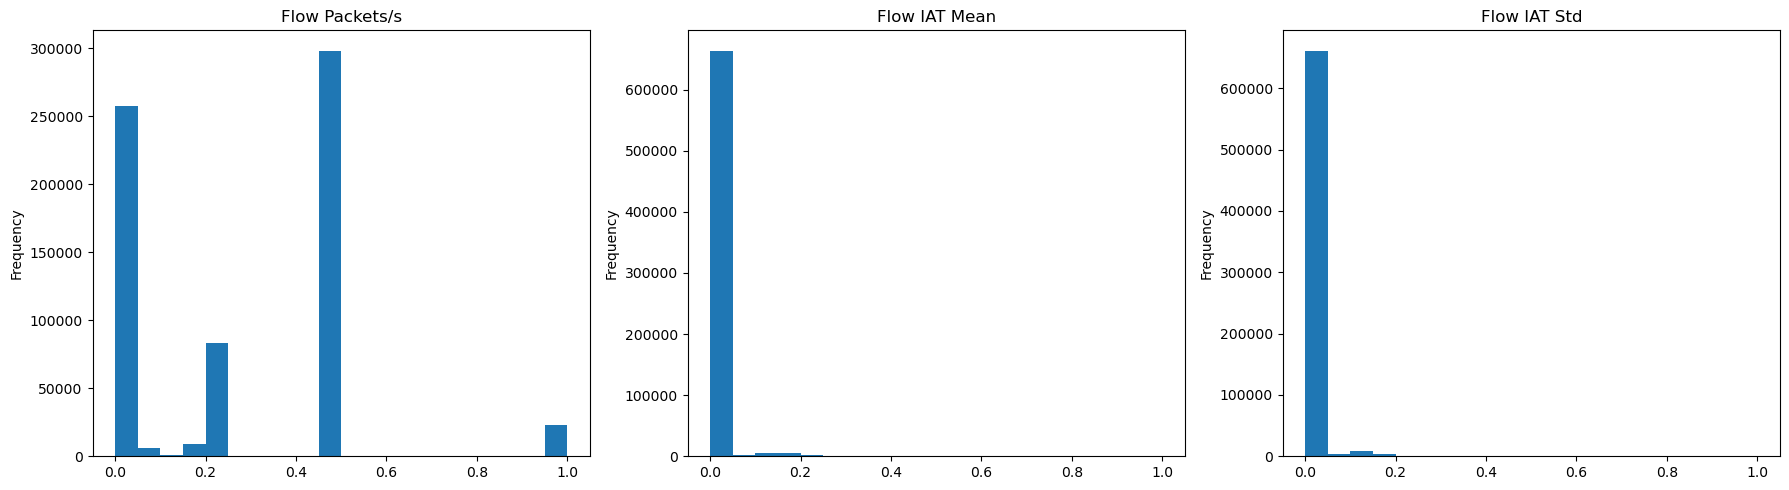

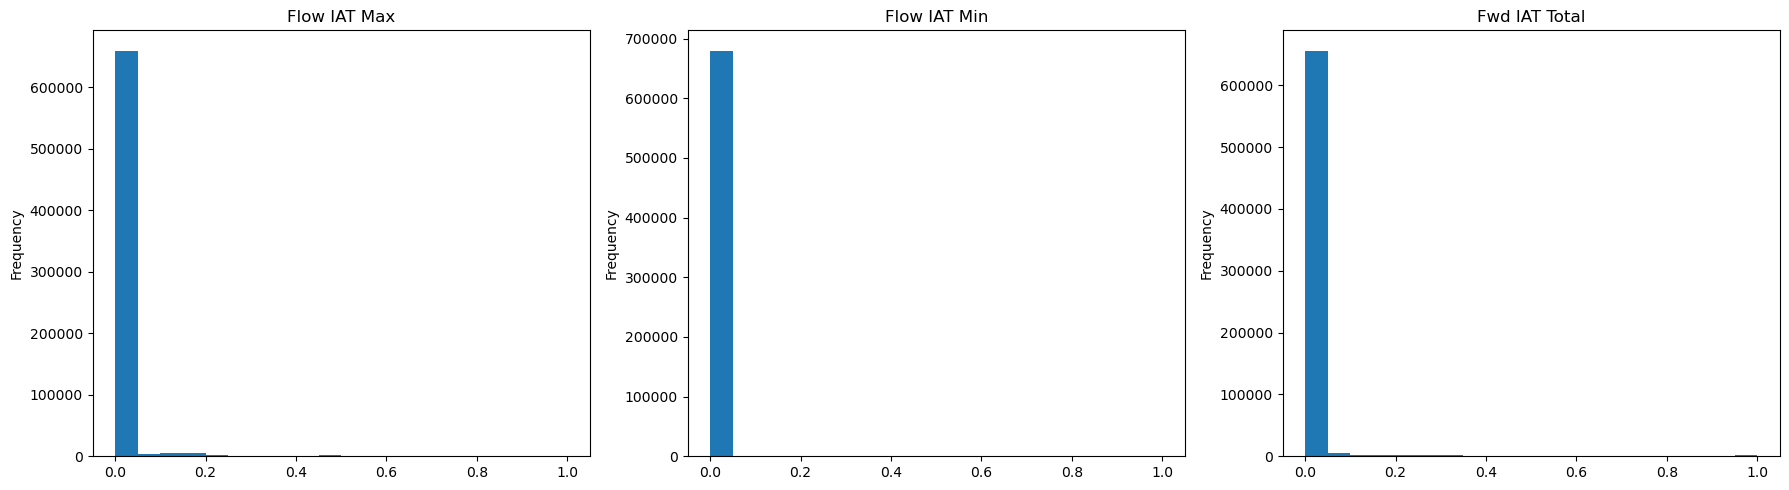

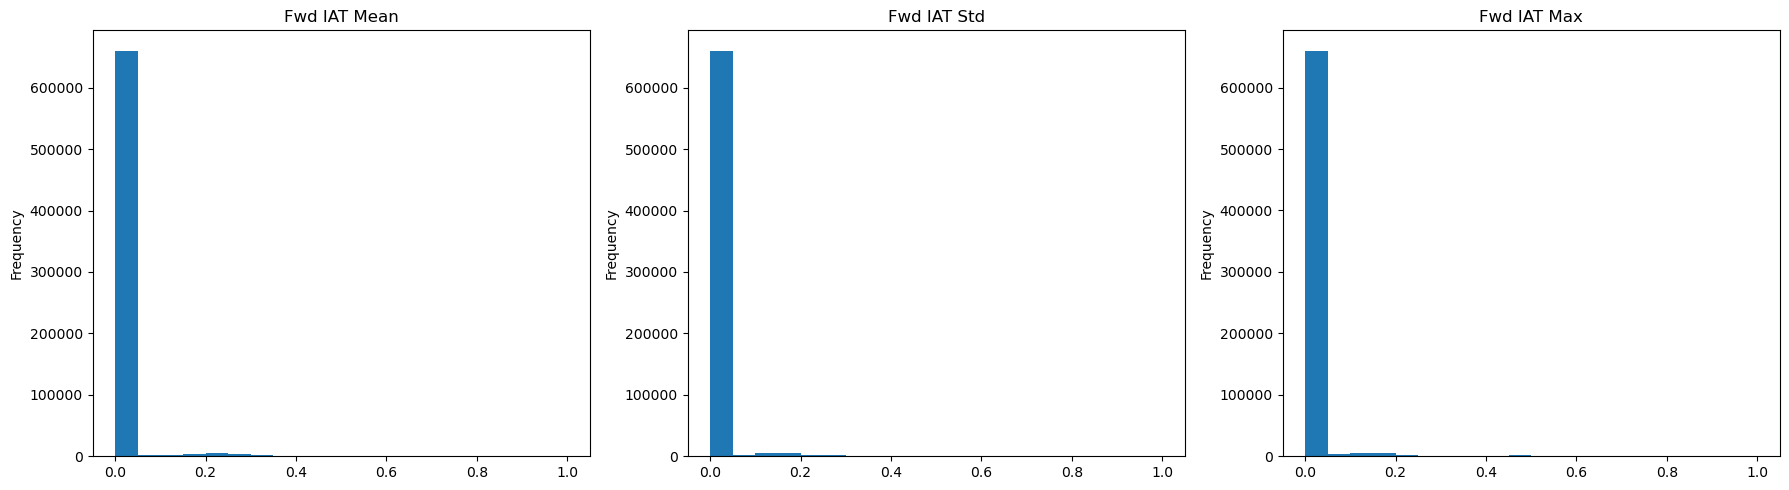

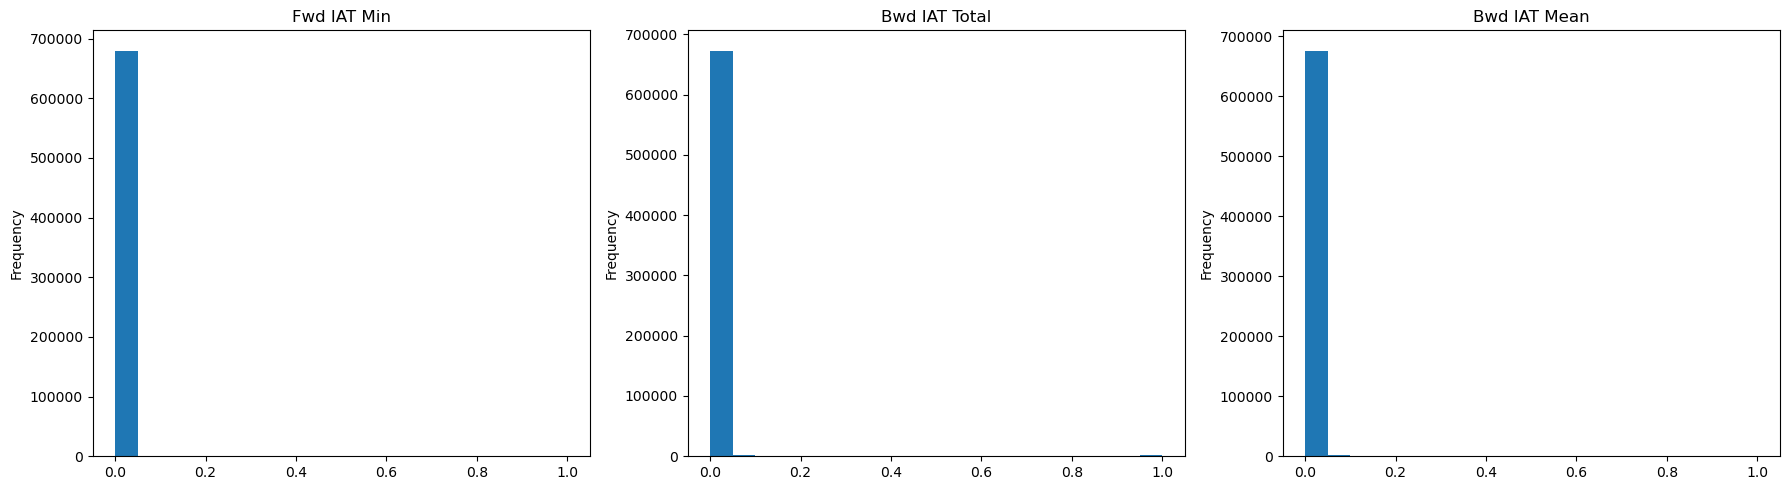

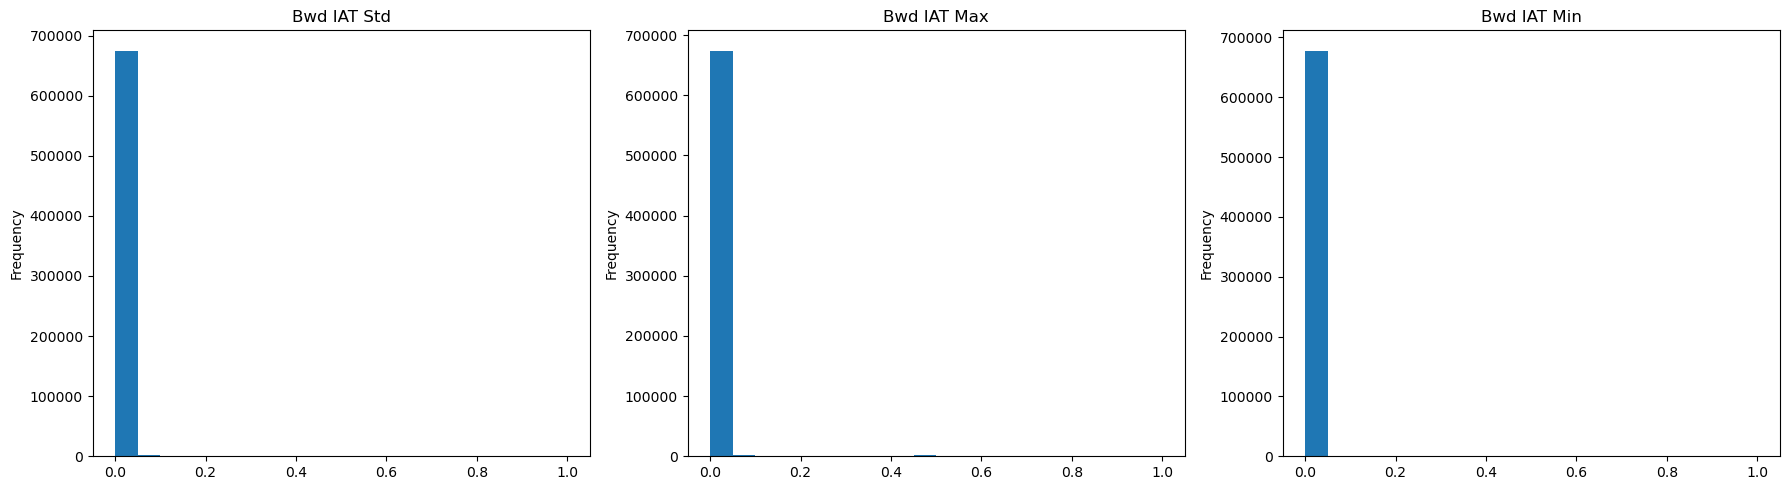

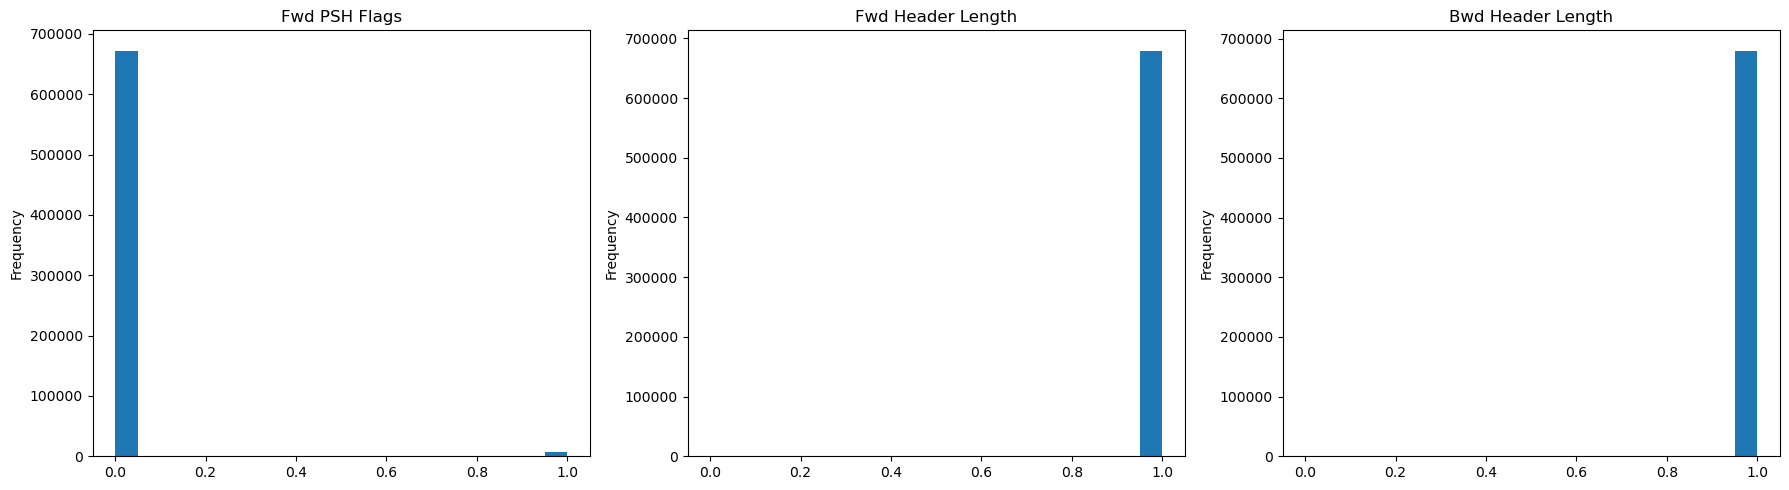

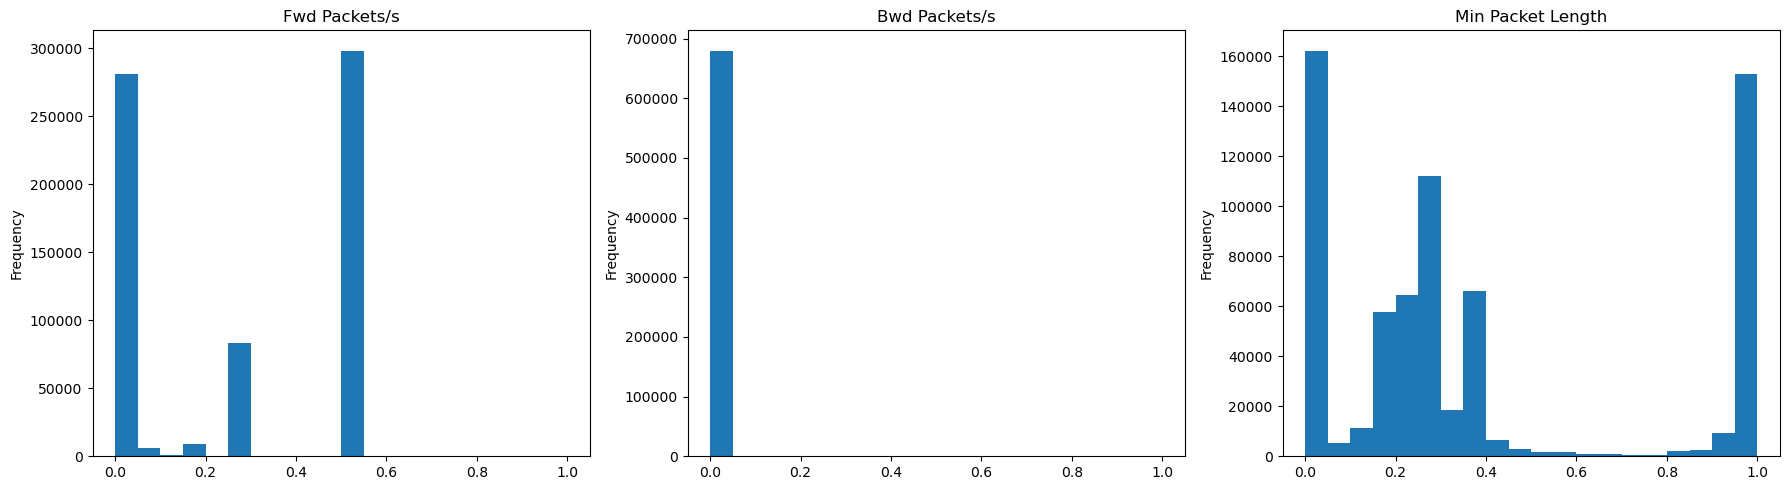

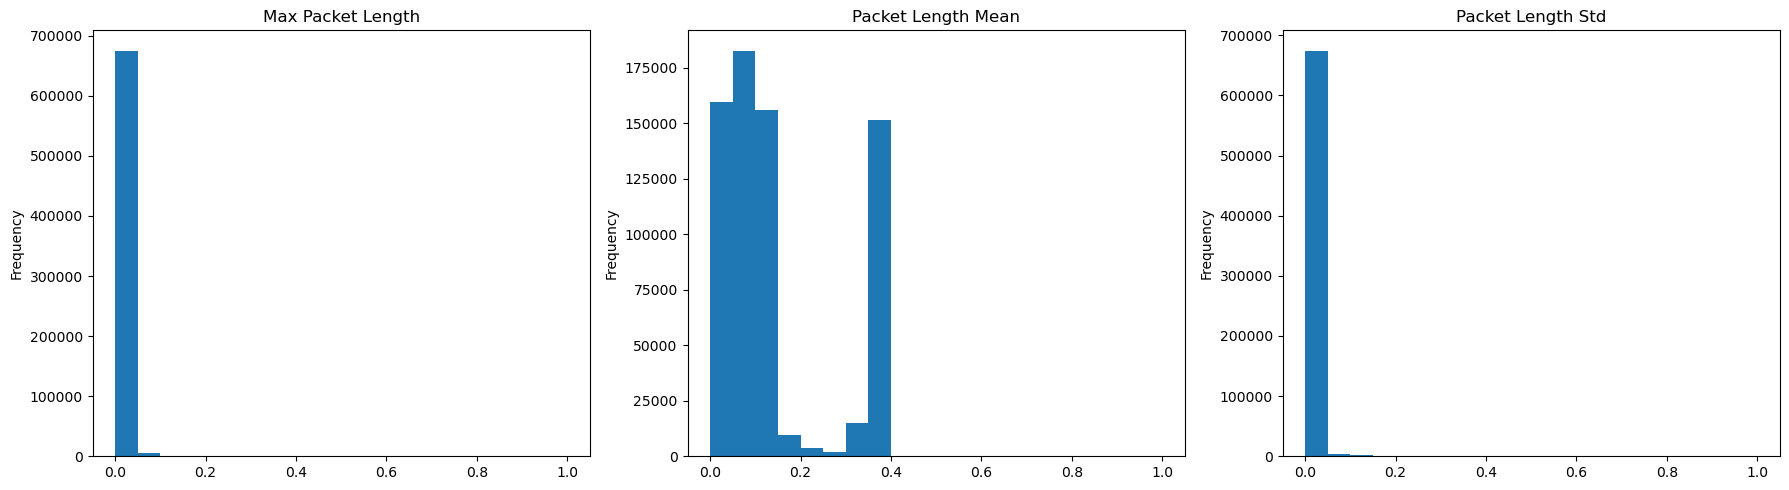

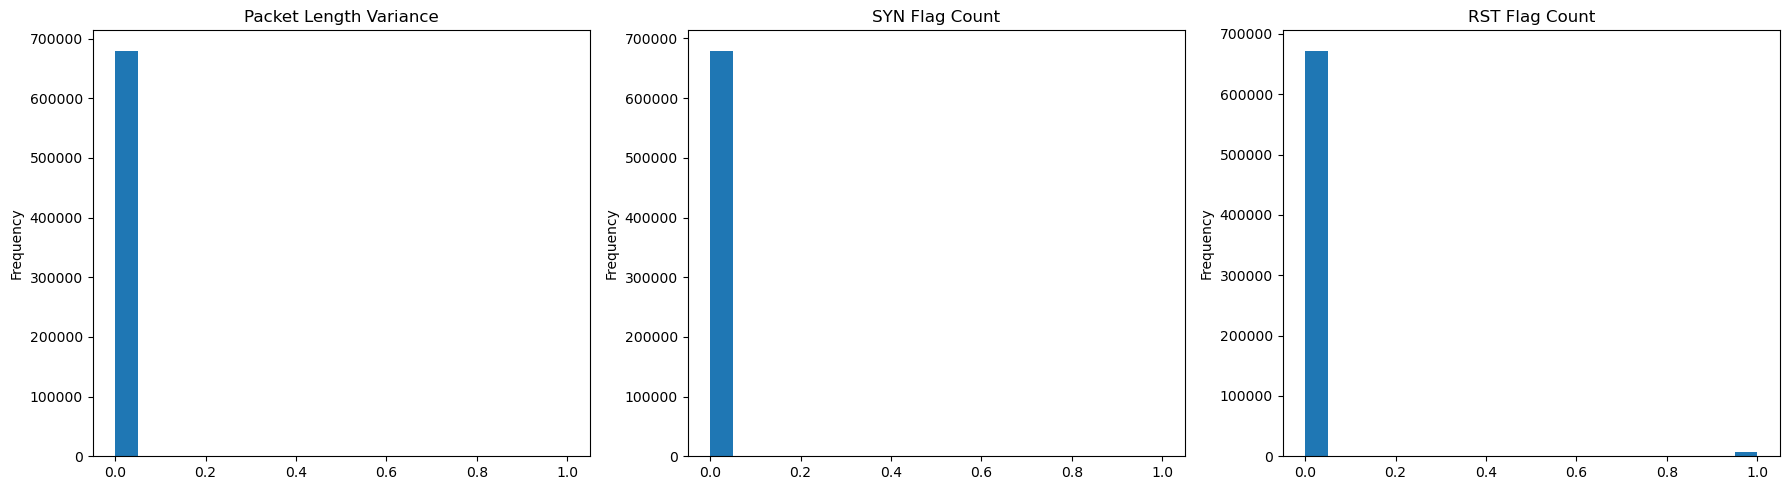

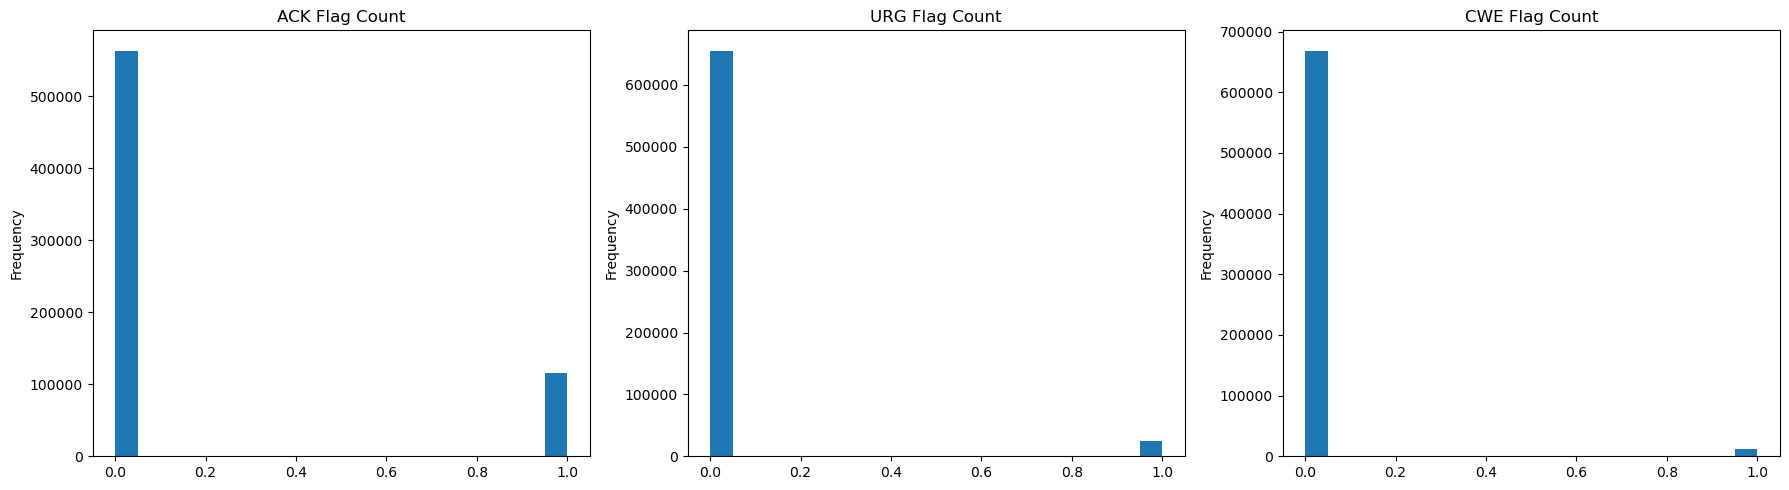

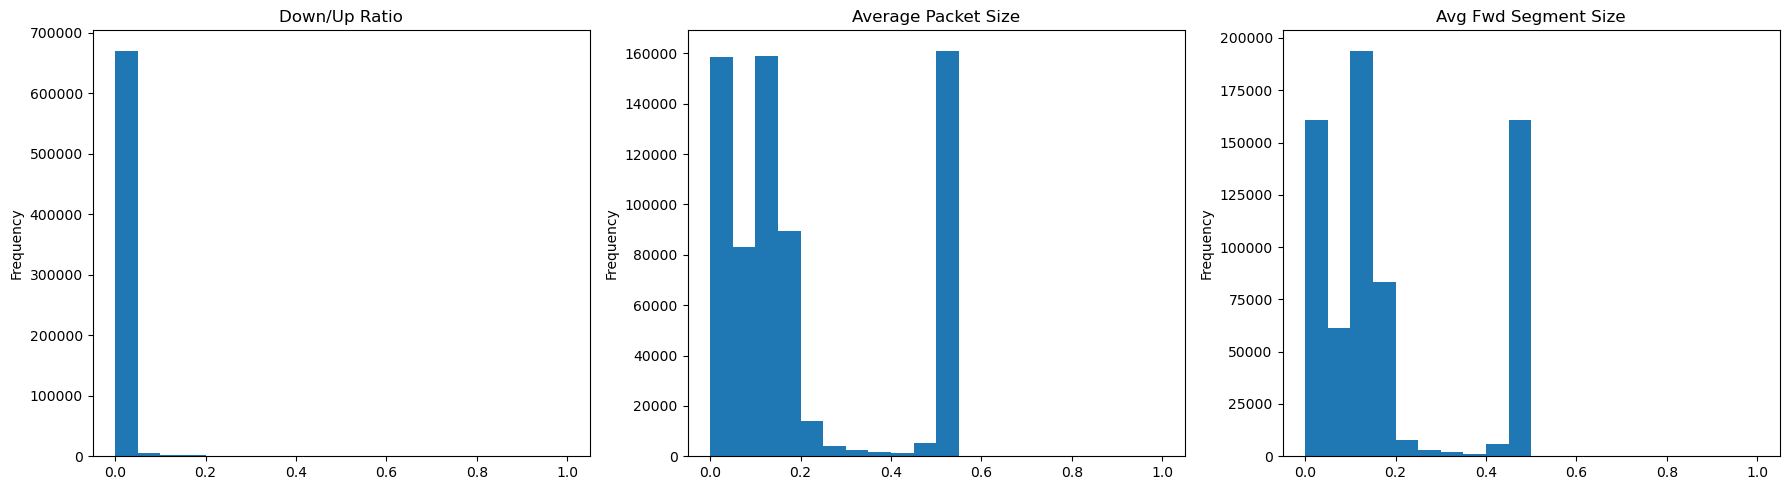

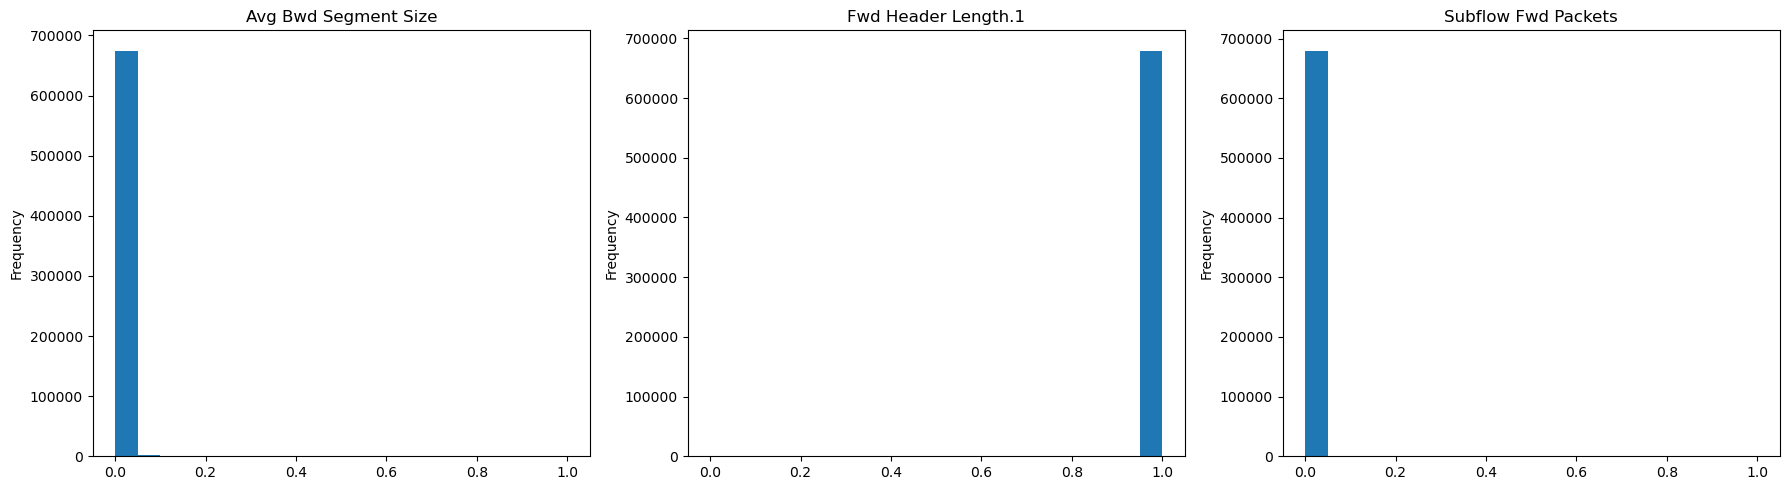

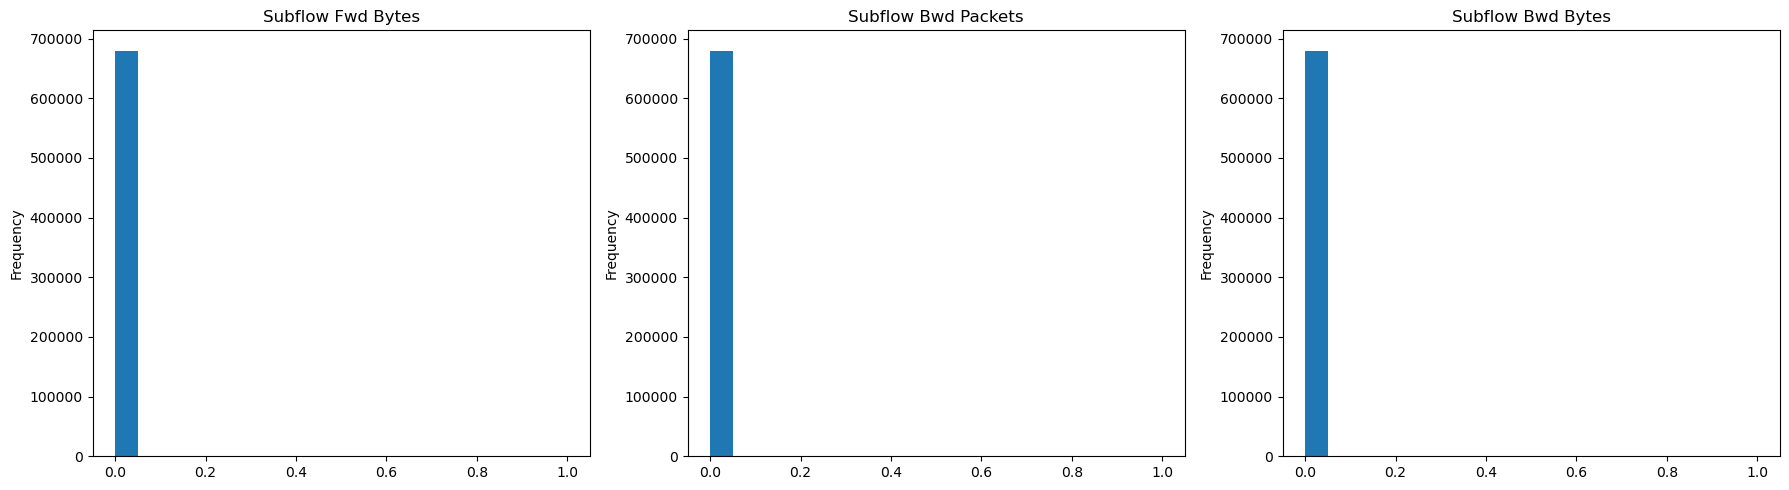

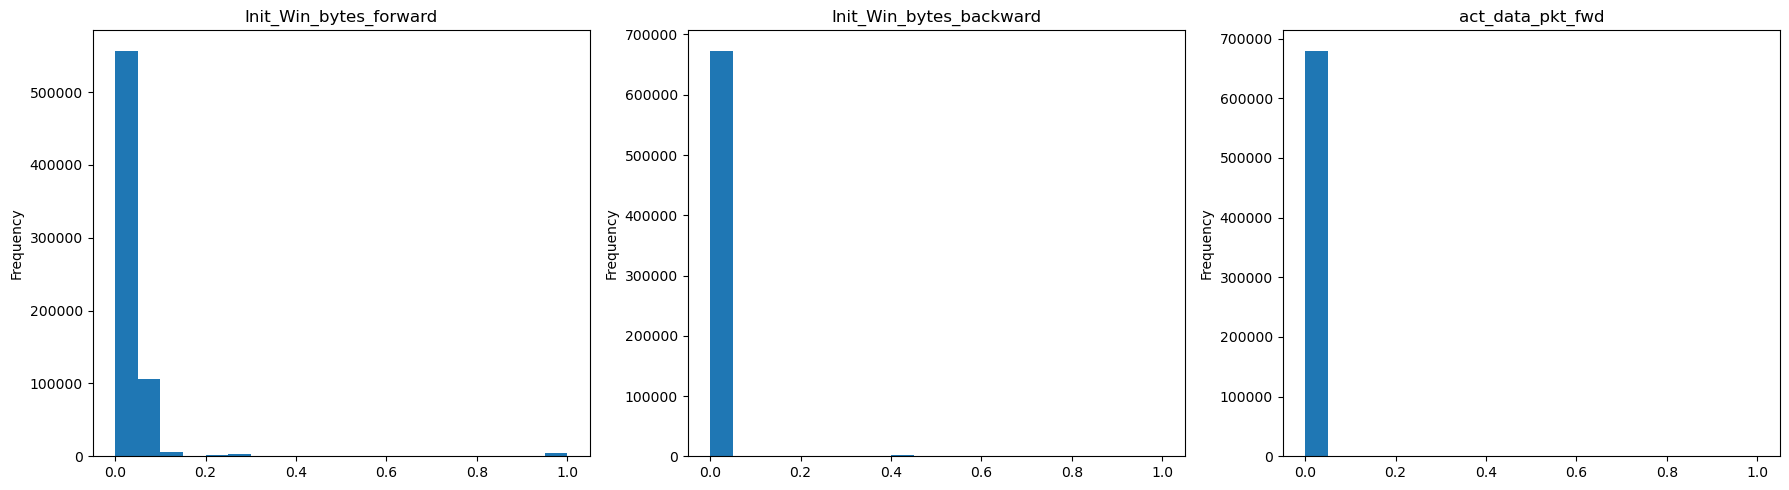

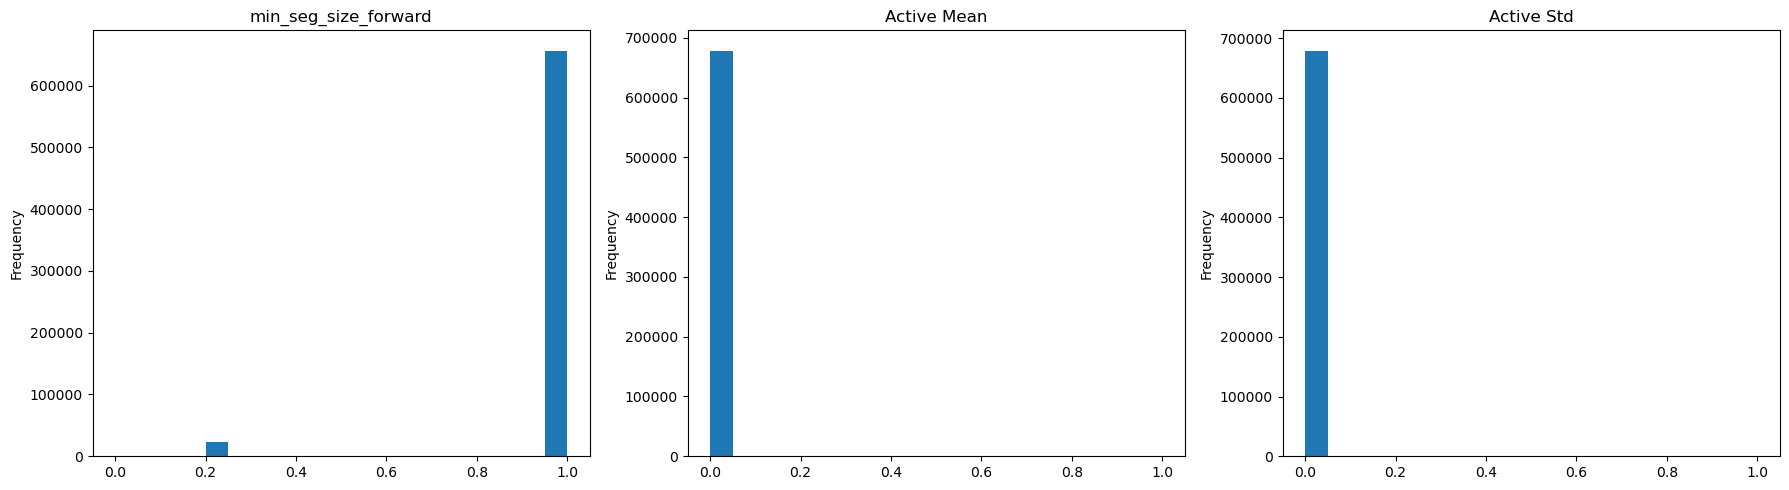

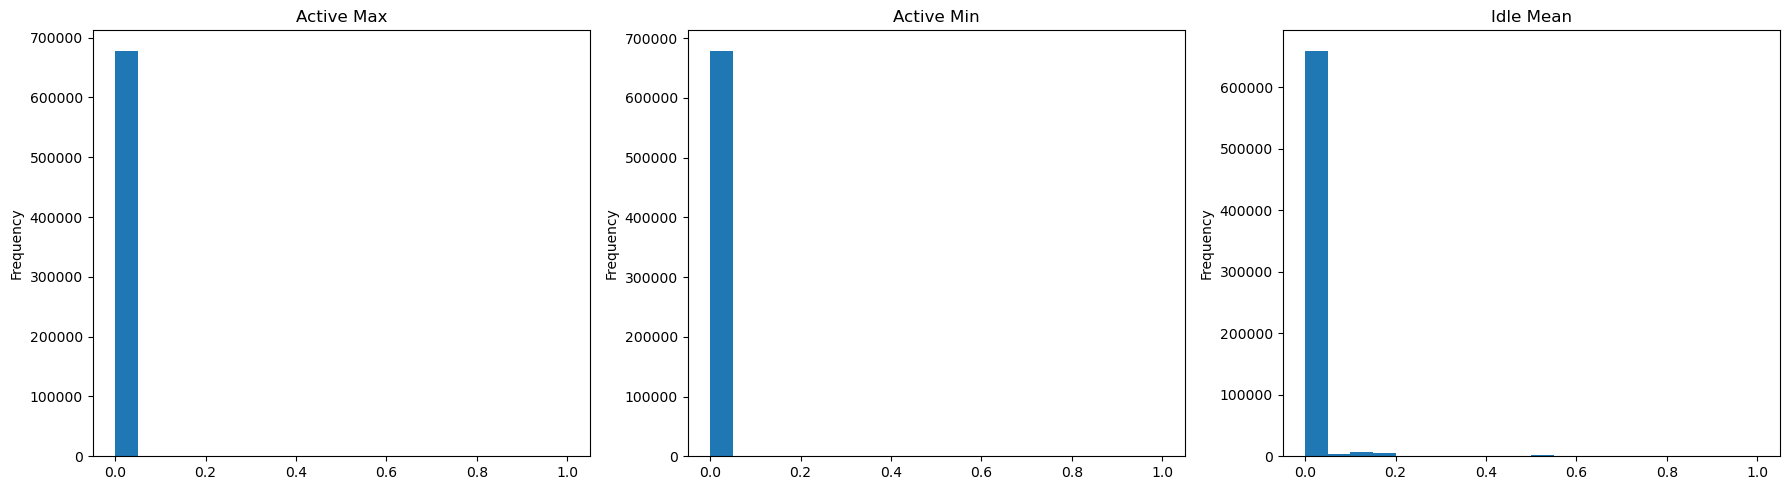

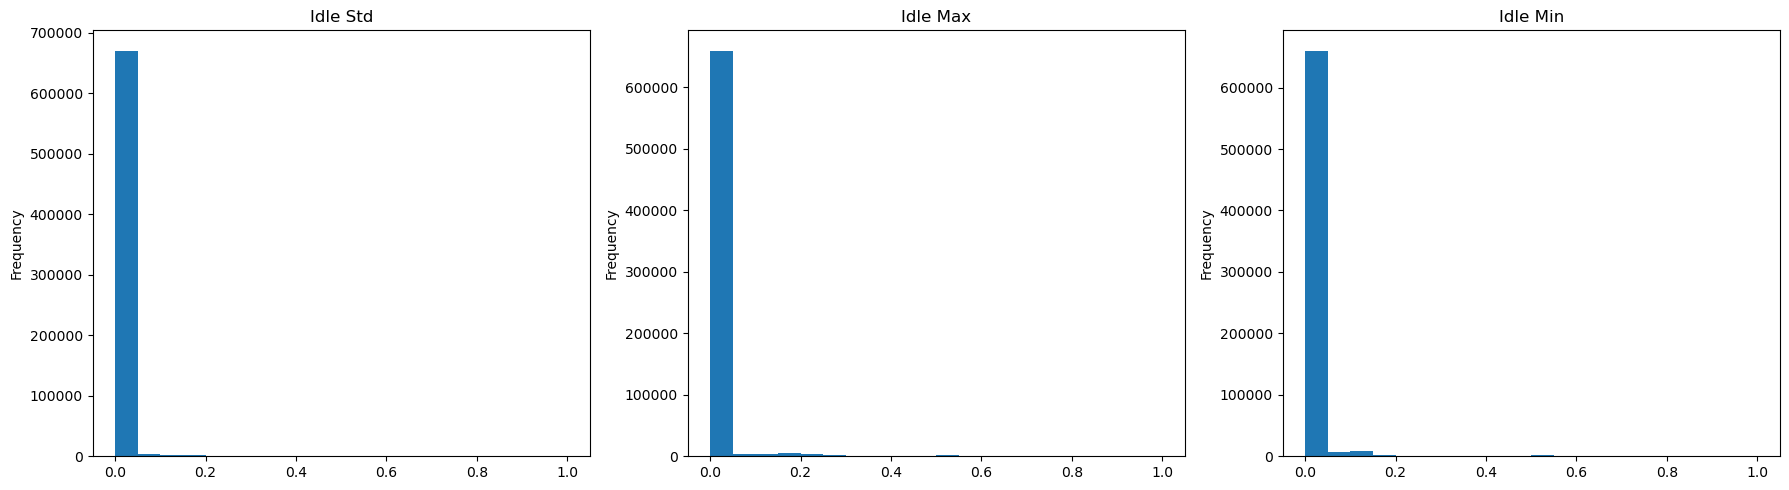

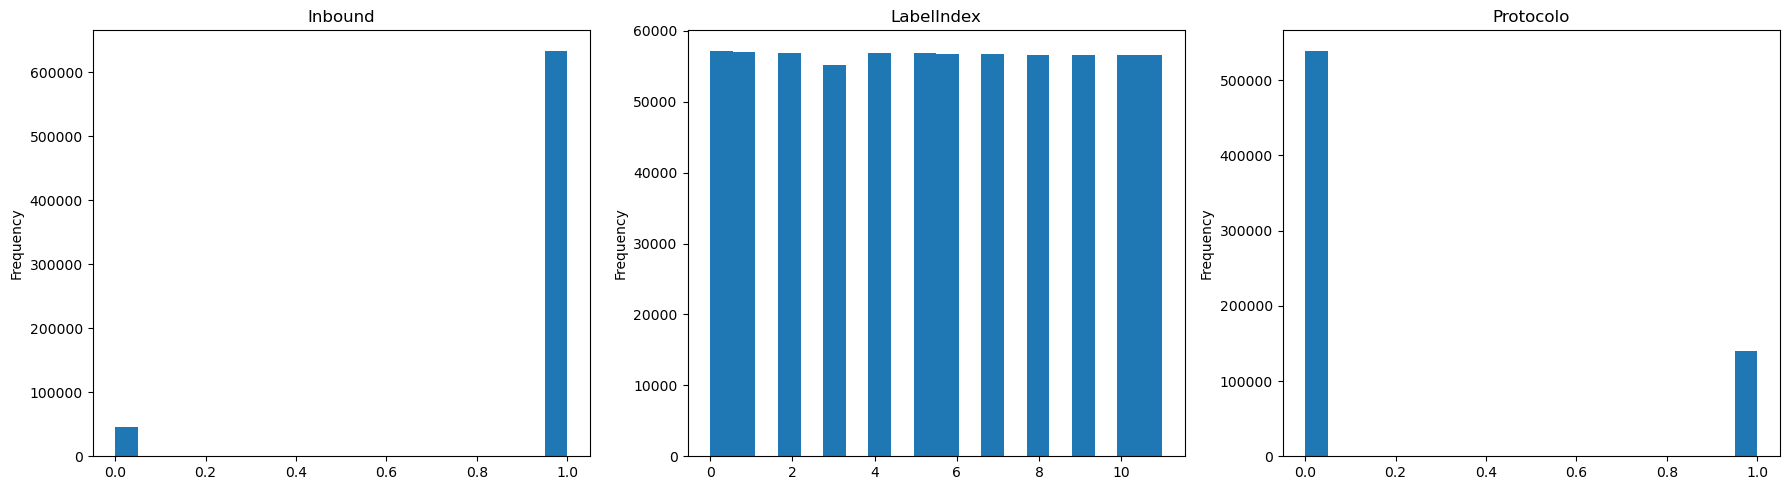

In [9]:
numeric_columns = df.columns

cols_per_row = 3

for i in range(0, len(numeric_columns), cols_per_row):
    fig, axes = plt.subplots(1, cols_per_row, figsize=(18, 5))
    for j in range(cols_per_row):
        if i + j < len(numeric_columns):
            ax = axes[j]
            df[numeric_columns[i + j]].plot(kind='hist', ax=ax, title=numeric_columns[i + j], bins=20)
        else:
            fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()